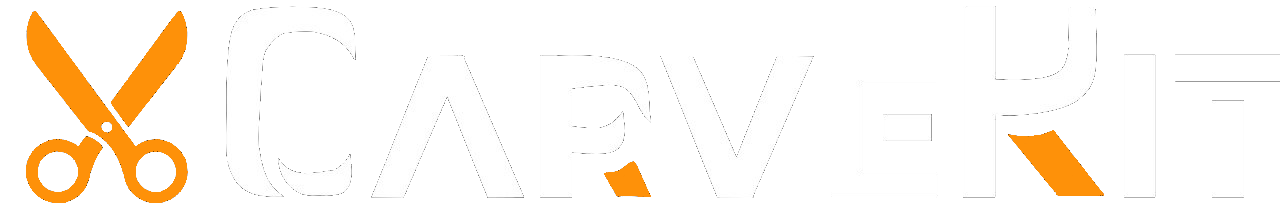

### Automated high-quality background removal framework for an image using neural networks



- 🏢 [Project at GitHub](https://github.com/OPHoperHPO/image-background-remove-tool) 🏢
- 🔗 [Author at GitHub](https://github.com/OPHoperHPO) 🔗

> Please rate our repository with ⭐ if you like our work! Thanks! 😀

This notebook supports **Google Colab GPU runtime**.

> **Enabling and testing the GPU** \
> Navigate to `Edit → Notebook Settings`. \
> Select `GPU` from the `Hardware Accelerator` drop-down.

# Install CarveKit

In [1]:
#@title Install colab-ready python package (Click the arrow on the left)
%cd /content
!pip install carvekit_colab


/content
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.3 MB/s eta 0:00:00


In [2]:
#@title Download all models
from carvekit.ml.files.models_loc import download_all

download_all();

# Remove background using CarveKit

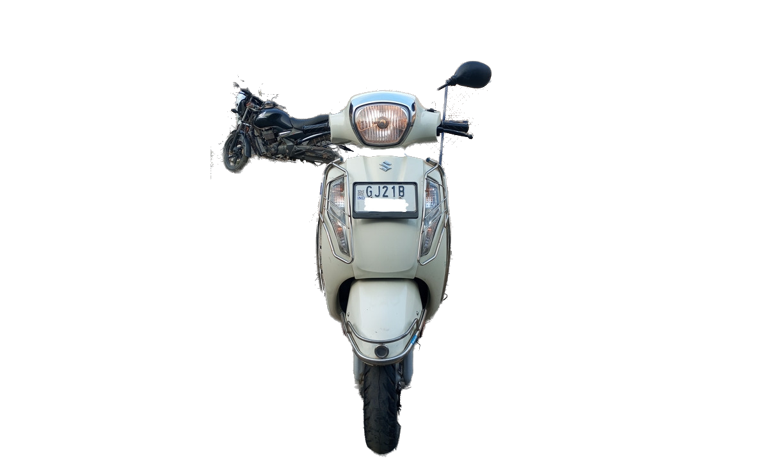

In [3]:
#@title Upload images from your computer
#@markdown Description of parameters
#@markdown - `SHOW_FULLSIZE`  - Shows image in full size (may take a long time to load)
#@markdown - `PREPROCESSING_METHOD`  - Preprocessing method
#@markdown - `SEGMENTATION_NETWORK`  - Segmentation network. Use `u2net` for hairs-like objects and `tracer_b7` for objects
#@markdown - `POSTPROCESSING_METHOD`  - Postprocessing method
#@markdown - `SEGMENTATION_MASK_SIZE` - Segmentation mask size. Use 640 for Tracer B7 and 320 for U2Net
#@markdown - `TRIMAP_DILATION`  - The size of the offset radius from the object mask in pixels when forming an unknown area
#@markdown - `TRIMAP_EROSION`  - The number of iterations of erosion that the object's mask will be subjected to before forming an unknown area
#@markdown > Look README.md and code for more details on networks and methods


import torch
from IPython import display
from google.colab import files
from carvekit.web.schemas.config import MLConfig
from carvekit.web.utils.init_utils import init_interface

SHOW_FULLSIZE = True #@param {type:"boolean"}
PREPROCESSING_METHOD = "none" #@param ["stub", "none"]
SEGMENTATION_NETWORK = "tracer_b7" #@param ["u2net", "deeplabv3", "basnet", "tracer_b7"]
POSTPROCESSING_METHOD = "fba" #@param ["fba", "none"]
SEGMENTATION_MASK_SIZE = 640 #@param ["640", "320"] {type:"raw", allow-input: true}
TRIMAP_DILATION = 30 #@param {type:"integer"}
TRIMAP_EROSION = 5 #@param {type:"integer"}
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'


config = MLConfig(segmentation_network=SEGMENTATION_NETWORK,
                  preprocessing_method=PREPROCESSING_METHOD,
                  postprocessing_method=POSTPROCESSING_METHOD,
                  seg_mask_size=SEGMENTATION_MASK_SIZE,
                  trimap_dilation=TRIMAP_DILATION,
                  trimap_erosion=TRIMAP_EROSION,
                  device=DEVICE)


interface = init_interface(config)




uploaded = files.upload().keys()
display.clear_output()
images = interface(uploaded)
for im in enumerate(images):
  if not SHOW_FULLSIZE:
    im[1].thumbnail((768, 768), resample=3)
  display.display(im[1])



In [4]:
pip install transparent-background

  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of albumentations to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of albumentations to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.6/535.6 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.4/899.4 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.4 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=0d3b728c0627f4a267565bd7cf38d8244a19f7c54e2502a845fca6db5d5c54ae
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: albucore
    Found existing insta

In [14]:
import os
import gdown

# Define the custom path
output_dir = "/content/my_files"
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Define the output file path
output_path = os.path.join(output_dir, "latest.pth")

# Define file ID and generate URL
file_id = "13oBl5MTVcWER3YU4fSxW3ATlVfueFQPY"
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
gdown.download(download_url, output_path, quiet=False)

# Print the download path
print(f"File downloaded to: {output_path}")


Downloading...
From (original): https://drive.google.com/uc?id=13oBl5MTVcWER3YU4fSxW3ATlVfueFQPY
From (redirected): https://drive.google.com/uc?id=13oBl5MTVcWER3YU4fSxW3ATlVfueFQPY&confirm=t&uuid=faf55a29-57e2-4724-bc98-28bf6ed5b55f
To: /content/my_files/latest.pth
100%|██████████| 368M/368M [00:02<00:00, 135MB/s]

File downloaded to: /content/my_files/latest.pth


In [12]:
print(os.getcwd())


/content


In [13]:
import cv2
import numpy as np

from PIL import Image
from transparent_background import Remover
ckpt = "/content/my_files/latest.pth"

# Load model
remover = Remover() # default setting
remover = Remover(mode='fast', jit=True, device='cuda:0', ckpt=ckpt) # custom setting
remover = Remover(mode='base-nightly') # nightly release checkpoint
remover = Remover(resize='dynamic') # use dynamic resizing instead of static resizing

# Usage for image
img = Image.open('/content/33_1733374573_6751326d1aa57.jpg').convert('RGB') # read image

out = remover.process(img) # default setting - transparent background
out = remover.process(img, type='rgba') # same as above
out = remover.process(img, type='map') # object map only
out = remover.process(img, type='green') # image matting - green screen
out = remover.process(img, type='white') # change backround with white color
out = remover.process(img, type=[255, 0, 0]) # change background with color code [255, 0, 0]
out = remover.process(img, type='blur') # blur background
out = remover.process(img, type='overlay') # overlay object map onto the image
out = remover.process(img, type='samples/background.jpg') # use another image as a background

out = remover.process(img, threshold=0.5) # use threhold parameter for hard prediction.
out = remover.process(img, reverse=True) # reverse output. background -> foreground

out.save('output.png') # save result
out.save('output.jpg') # save as jpg

# Usage for video
cap = cv2.VideoCapture('samples/b5.mp4') # video reader for input
fps = cap.get(cv2.CAP_PROP_FPS)

writer = None

while cap.isOpened():
    ret, frame = cap.read() # read video

    if ret is False:
        break

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(frame).convert('RGB')

    if writer is None:
        writer = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, img.size) # video writer for output

    out = remover.process(img, type='map') # same as image, except for 'rgba' which is not for video.
    writer.write(cv2.cvtColor(np.array(out), cv2.COLOR_BGR2RGB))

cap.release()
writer.release()

/usr/local/lib/python3.10/dist-packages/transparent_background/Remover.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(os.path.join(ckpt_dir, ckpt_name), map

Settings -> Mode=base, Device=cuda:0, Torchscript=disabled


FileNotFoundError: [Errno 2] No such file or directory: '/content/my_files/latest.pth'